# Combine and Clean Tabular Financial Statements Data

Merge financial statement files together

Handle outlier values of financial variables

Construct financial ratios and Z-scores

In [28]:
# Packages
import pandas as pd
import openpyxl
import numpy as np

## Load and Merge Files

In [29]:
# Inner join the three tabuler_fin_data files (columns symbol, calendarYear, period (with Q removed) from fin data)

files_to_load = [r'balance_sheet', r'cash_flow_statement', r'income_statement']

# Loop through and load or inner join each file onto merged
for i, file in enumerate(files_to_load):
    print('loading ' + file)
    df = pd.read_csv(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\tabuler_fin_data(' + file + r').csv')
    # Delete the first column (index)
    df = df.iloc[:,1:]
    # Remove Q from period
    df['period'] = df['period'].str.replace('Q', '')
    # Convert to int
    df['period'] = df['period'].astype(int)
    # Print values of Period
    print(df['period'].unique())
    # Load or merge file
    if i == 0:
        merged = df
    else:
        merged = pd.merge(merged, df, on=['symbol', 'calendarYear', 'period', 'reportedCurrency'], how='inner')
    # Remove suffix _x
    merged.columns = merged.columns.str.replace('_x', '')
    # Harmonize suffix y
    merged.columns = merged.columns.str.replace('_y', '_' + file)
    del df
    
print('length of merged: ' + str(len(merged)))
merged.head(10)

loading balance_sheet
[3 2 1 4]
loading cash_flow_statement
[3 2 1 4]
loading income_statement
[3 2 1 4]
length of merged: 54109


,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome_income_statement,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link_income_statement,finalLink_income_statement
0,2023-09-30,BCE,CAD,718940,2023-09-30,2023-09-29 20:00:00,2023,3,"619,000,000.00",0.00,...,0.16,"243,000,000.00","687,000,000.00",0.11,0.70,0.70,"912,300,000.00","912,300,000.00",NaN,NaN
1,2023-06-30,BCE,CAD,718940,2023-06-30,2023-06-30 00:00:00,2023,2,"900,000,000.00",0.00,...,0.11,"273,000,000.00","375,000,000.00",0.06,0.37,0.37,"912,200,000.00","912,500,000.00",NaN,NaN
2,2023-03-31,BCE,CAD,718940,2023-03-31,2023-03-31 00:00:00,2023,1,"741,000,000.00",0.00,...,0.17,"270,000,000.00","771,000,000.00",0.13,0.79,0.79,"912,100,000.00","912,300,000.00",NaN,NaN
3,2022-12-31,BCE,CAD,718940,2022-12-31,2022-12-30 19:00:00,2022,4,"149,000,000.00",0.00,...,0.12,"222,000,000.00","572,000,000.00",0.09,0.58,0.58,"912,000,000.00","912,200,000.00",NaN,NaN
4,2022-09-30,BCE,CAD,718940,2022-09-30,2022-09-29 20:00:00,2022,3,"733,000,000.00",0.00,...,0.16,"178,000,000.00","715,000,000.00",0.12,0.83,0.83,"911,900,000.00","912,300,000.00",NaN,NaN
5,2022-06-30,BCE,CAD,718940,2022-06-30,2022-06-29 20:00:00,2022,2,"596,000,000.00",0.00,...,0.15,"232,000,000.00","596,000,000.00",0.10,0.69,0.69,"911,900,000.00","912,800,000.00",NaN,NaN
6,2022-03-31,BCE,CAD,718940,2022-03-31,2022-03-30 20:00:00,2022,1,"104,000,000.00",0.00,...,0.22,"335,000,000.00","877,000,000.00",0.15,1.03,1.03,"910,100,000.00","910,800,000.00",NaN,NaN
7,2021-12-31,BCE,CAD,718940,2021-12-31,2021-12-30 19:00:00,2021,4,"207,000,000.00",0.00,...,0.15,"249,000,000.00","658,000,000.00",0.11,0.69,0.69,"908,800,000.00","909,600,000.00",NaN,NaN
8,2021-09-30,BCE,CAD,718940,2021-09-30,2021-09-29 20:00:00,2021,3,"2,167,000,000.00",0.00,...,0.19,"306,000,000.00","791,000,000.00",0.14,0.83,0.83,"906,900,000.00","907,600,000.00",NaN,NaN
9,2021-06-30,BCE,CAD,718940,2021-06-30,2021-06-29 20:00:00,2021,2,"1,752,000,000.00",0.00,...,0.17,"236,000,000.00","717,000,000.00",0.13,0.76,0.76,"905,000,000.00","905,300,000.00",NaN,NaN


In [30]:
# Limit to 2010 to 2016
merged = merged[(merged.calendarYear >= 2010) & (merged.calendarYear <= 2016)]
merged

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome_income_statement,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link_income_statement,finalLink_income_statement
27,2016-12-31,BCE,CAD,718940,2017-01-06,2017-01-06 09:47:58,2016,4,"853,000,000.00",0.00,...,0.17,"252,000,000.00","690,000,000.00",0.12,0.79,0.79,"875,700,000.00","876,600,000.00",https://www.sec.gov/Archives/edgar/data/718940...,https://www.sec.gov/Archives/edgar/data/718940...
28,2016-09-30,BCE,CAD,718940,2016-11-03,2016-11-03 13:03:14,2016,3,"1,393,000,000.00",0.00,...,0.20,"284,000,000.00","784,000,000.00",0.14,0.87,0.87,"869,900,000.00","871,400,000.00",https://www.sec.gov/Archives/edgar/data/718940...,https://www.sec.gov/Archives/edgar/data/718940...
29,2016-06-30,BCE,CAD,718940,2016-08-17,2016-08-17 15:42:10,2016,2,"615,000,000.00",0.00,...,0.21,"315,000,000.00","813,000,000.00",0.15,0.89,0.89,"869,100,000.00","870,300,000.00",https://www.sec.gov/Archives/edgar/data/718940...,https://www.sec.gov/Archives/edgar/data/718940...
30,2016-03-31,BCE,CAD,718940,2016-04-28,2016-04-28 13:54:50,2016,1,"423,000,000.00",0.00,...,0.19,"259,000,000.00","744,000,000.00",0.14,0.82,0.82,"867,100,000.00","868,100,000.00",https://www.sec.gov/Archives/edgar/data/718940...,https://www.sec.gov/Archives/edgar/data/718940...
31,2015-12-31,BCE,CAD,718940,2016-02-04,2016-02-04 11:26:36,2015,4,"613,000,000.00",0.00,...,0.13,"188,000,000.00","533,000,000.00",0.10,0.58,0.58,"853,500,000.00","854,900,000.00",https://www.sec.gov/Archives/edgar/data/718940...,https://www.sec.gov/Archives/edgar/data/718940...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54092,2011-03-31,YORW,USD,108985,2011-05-06,2011-05-06 09:54:29,2011,1,"2,704,000.00",0.00,...,0.34,"1,164,000.00","2,139,000.00",0.22,0.17,0.17,"12,695,604.00","12,695,604.00",https://www.sec.gov/Archives/edgar/data/108985...,https://www.sec.gov/Archives/edgar/data/108985...
54093,2010-12-31,YORW,USD,108985,2011-03-08,2011-03-08 11:49:51,2010,4,"1,327,000.00",0.00,...,0.35,"1,340,000.00","2,076,000.00",0.21,0.16,0.16,"12,695,604.00","12,695,604.00",https://www.sec.gov/Archives/edgar/data/108985...,https://www.sec.gov/Archives/edgar/data/108985...
54094,2010-09-30,YORW,USD,108985,2010-11-05,2010-11-05 14:39:52,2010,3,"500,000.00",0.00,...,0.41,"1,639,000.00","2,670,000.00",0.25,0.21,0.21,"12,648,338.00","12,648,338.00",https://www.sec.gov/Archives/edgar/data/108985...,https://www.sec.gov/Archives/edgar/data/108985...
54095,2010-06-30,YORW,USD,108985,2010-08-06,2010-08-06 14:11:39,2010,2,"500,000.00",0.00,...,0.39,"1,433,000.00","2,344,000.00",0.24,0.18,0.18,"12,613,839.00","12,613,839.00",https://www.sec.gov/Archives/edgar/data/108985...,https://www.sec.gov/Archives/edgar/data/108985...


In [31]:
# Add market cap
market_cap = pd.read_parquet(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin/daily_market_cap.parquet')
market_cap.head(10)

,symbol,date,marketCap
3,AA,2010-01-04,"7,269,817,000.00"
4,AA,2010-01-05,"7,042,692,000.00"
5,AA,2010-01-06,"7,409,726,000.00"
6,AA,2010-01-07,"7,251,646,999.00"
7,AA,2010-01-08,"7,431,530,000.00"
8,AA,2010-01-09,"7,431,530,000.00"
9,AA,2010-01-10,"7,431,530,000.00"
10,AA,2010-01-11,"7,618,681,000.00"
11,AA,2010-01-12,"6,775,593,000.00"
12,AA,2010-01-13,"6,977,280,000.00"


In [32]:
# Left join on date and symbol
# convert date to datetime
merged['date'] = pd.to_datetime(merged['date'])
merged = pd.merge(merged, market_cap, on=['symbol', 'date'], how='left')

# Delete market_cap to save memory
del market_cap

merged

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,cashAndCashEquivalents,shortTermInvestments,...,incomeTaxExpense,netIncome_income_statement,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link_income_statement,finalLink_income_statement,marketCap
0,2016-12-31,BCE,CAD,718940,2017-01-06,2017-01-06 09:47:58,2016,4,"853,000,000.00",0.00,...,"252,000,000.00","690,000,000.00",0.12,0.79,0.79,"875,700,000.00","876,600,000.00",https://www.sec.gov/Archives/edgar/data/718940...,https://www.sec.gov/Archives/edgar/data/718940...,"37,865,268,000.00"
1,2016-09-30,BCE,CAD,718940,2016-11-03,2016-11-03 13:03:14,2016,3,"1,393,000,000.00",0.00,...,"284,000,000.00","784,000,000.00",0.14,0.87,0.87,"869,900,000.00","871,400,000.00",https://www.sec.gov/Archives/edgar/data/718940...,https://www.sec.gov/Archives/edgar/data/718940...,"40,171,982,000.00"
2,2016-06-30,BCE,CAD,718940,2016-08-17,2016-08-17 15:42:10,2016,2,"615,000,000.00",0.00,...,"315,000,000.00","813,000,000.00",0.15,0.89,0.89,"869,100,000.00","870,300,000.00",https://www.sec.gov/Archives/edgar/data/718940...,https://www.sec.gov/Archives/edgar/data/718940...,"41,117,121,000.00"
3,2016-03-31,BCE,CAD,718940,2016-04-28,2016-04-28 13:54:50,2016,1,"423,000,000.00",0.00,...,"259,000,000.00","744,000,000.00",0.14,0.82,0.82,"867,100,000.00","868,100,000.00",https://www.sec.gov/Archives/edgar/data/718940...,https://www.sec.gov/Archives/edgar/data/718940...,"39,487,734,000.00"
4,2015-12-31,BCE,CAD,718940,2016-02-04,2016-02-04 11:26:36,2015,4,"613,000,000.00",0.00,...,"188,000,000.00","533,000,000.00",0.10,0.58,0.58,"853,500,000.00","854,900,000.00",https://www.sec.gov/Archives/edgar/data/718940...,https://www.sec.gov/Archives/edgar/data/718940...,"32,962,169,999.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22443,2011-03-31,YORW,USD,108985,2011-05-06,2011-05-06 09:54:29,2011,1,"2,704,000.00",0.00,...,"1,164,000.00","2,139,000.00",0.22,0.17,0.17,"12,695,604.00","12,695,604.00",https://www.sec.gov/Archives/edgar/data/108985...,https://www.sec.gov/Archives/edgar/data/108985...,"221,469,458.00"
22444,2010-12-31,YORW,USD,108985,2011-03-08,2011-03-08 11:49:51,2010,4,"1,327,000.00",0.00,...,"1,340,000.00","2,076,000.00",0.21,0.16,0.16,"12,695,604.00","12,695,604.00",https://www.sec.gov/Archives/edgar/data/108985...,https://www.sec.gov/Archives/edgar/data/108985...,"219,506,993.00"
22445,2010-09-30,YORW,USD,108985,2010-11-05,2010-11-05 14:39:52,2010,3,"500,000.00",0.00,...,"1,639,000.00","2,670,000.00",0.25,0.21,0.21,"12,648,338.00","12,648,338.00",https://www.sec.gov/Archives/edgar/data/108985...,https://www.sec.gov/Archives/edgar/data/108985...,"203,510,532.00"
22446,2010-06-30,YORW,USD,108985,2010-08-06,2010-08-06 14:11:39,2010,2,"500,000.00",0.00,...,"1,433,000.00","2,344,000.00",0.24,0.18,0.18,"12,613,839.00","12,613,839.00",https://www.sec.gov/Archives/edgar/data/108985...,https://www.sec.gov/Archives/edgar/data/108985...,"179,606,399.00"


In [33]:
# Summarize marketCap variable
print(merged['marketCap'].describe())

count            19,440.00
mean     19,583,373,467.31
std      44,910,046,006.03
min             714,268.80
25%       1,897,514,625.00
50%       5,219,717,975.00
75%      17,152,437,500.00
max     726,320,349,360.00
Name: marketCap, dtype: float64


## Currencies and Dropping Non-USD

<Axes: xlabel='reportedCurrency'>

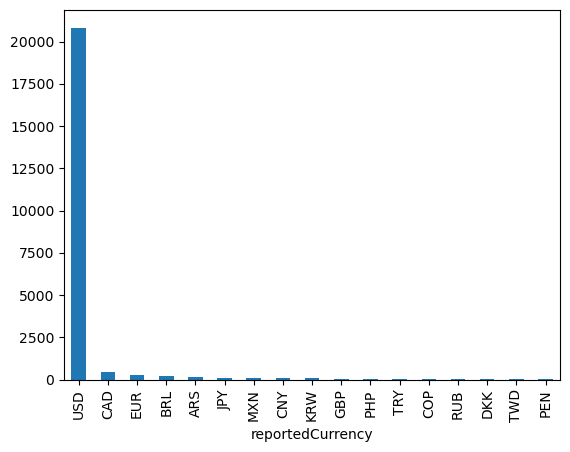

In [34]:
# Bar chart of ReportedCurrency
merged['reportedCurrency'].value_counts().plot(kind='bar')

In [35]:
# Number of currencies per company
print(merged[['symbol', 'reportedCurrency']].groupby('symbol').nunique().sort_values('reportedCurrency', ascending=False))

# Do any companies not report in USD?
all_companies = merged['symbol'].unique()
print('total companies: ' + str(len(all_companies)))
usd_companies = merged[merged['reportedCurrency'] == 'USD']['symbol'].unique()
non_usd_companies = [x for x in all_companies if x not in usd_companies]
print('never in usd companies:', len(non_usd_companies))

# Check if never in USD companies have credit rating data
# '~\Box\STAT 222 Capstone\Intermediate Data\Credit_Rating\combined_credit_rating_data.csv'
credit_ratings = pd.read_csv(r'~\Box\STAT 222 Capstone\Intermediate Data\Credit_Rating\combined_credit_rating_data.csv')
#print(credit_ratings.head(10))
credit_rating_companies = credit_ratings['Symbol'].unique()
print('never in usd companies with credit rating data:', [x for x in non_usd_companies if x in credit_rating_companies])

        reportedCurrency
symbol                  
BIDU                   2
AA                     1
OC                     1
NVDA                   1
NVO                    1
...                  ...
FBHS                   1
FCAU                   1
FCN                    1
FCX                    1
ZTS                    1

[859 rows x 1 columns]
total companies: 859
never in usd companies: 63
never in usd companies with credit rating data: ['BCE', 'CCJ', 'CVE', 'ENB', 'FTS', 'IMO', 'SJR', 'TAC', 'TECK', 'AMX', 'CCEP', 'CNI', 'E', 'GSK', 'KOF', 'NGG', 'PHG', 'TEF', 'ACH', 'AMOV', 'ASML', 'BABA', 'BAK', 'BRFS', 'BTI', 'CPAC', 'CRESY', 'FCAU', 'FMS', 'GGB', 'HMC', 'IRCP', 'KEP', 'NOK', 'PHI', 'PKX', 'PTR', 'RCI', 'SBS', 'SKM', 'SONY', 'TKC', 'IBA', 'ABEV', 'BTE', 'CAJ', 'CNQ', 'EC', 'GLPG', 'GRFS', 'MBT', 'NVO', 'PDS', 'SAP', 'TAK', 'TEO', 'TSM', 'UGP', 'VIV', 'YPF', 'CP', 'IRS', 'VLRS']


Many companies don't have USD financials, confirmed looking at API.

In [36]:
# are symbol by calendarYear by period ever in multiple currencies?
print(merged[['symbol', 'calendarYear', 'period', 'reportedCurrency']].drop_duplicates().groupby(['symbol', 'calendarYear', 'period']).nunique().sort_values('reportedCurrency', ascending=False))

                            reportedCurrency
symbol calendarYear period                  
AA     2015         4                      1
NWL    2015         4                      1
NWN    2010         4                      1
                    3                      1
                    2                      1
...                                      ...
FANG   2012         2                      1
                    1                      1
       2011         4                      1
                    3                      1
ZTS    2016         4                      1

[22448 rows x 1 columns]


In [37]:
print('number of symbol by calendarYear by period before USD limitation')
print(len(merged[['symbol', 'calendarYear', 'period']].drop_duplicates()))

# Drop non-USD items from merged
merged_usd = merged[merged['reportedCurrency'] == 'USD']

print('number of symbol by calendarYear by period after USD limitation')
print(len(merged_usd[['symbol', 'calendarYear', 'period']].drop_duplicates()))

# Output list of symbol by calendarYear by period lost due to USD limitation
# Outer join to find the missing ones
merged_outer_usd = pd.merge(merged, merged_usd, on=['symbol', 'calendarYear', 'period'], how='outer', indicator=True)
lost_due_to_limitation = merged_outer_usd[merged_outer_usd['_merge'] == 'left_only'][['symbol', 'calendarYear', 'period']]
lost_due_to_limitation_and_in_credit_rating = lost_due_to_limitation[lost_due_to_limitation['symbol'].isin(credit_rating_companies)]
print('length of lost_due_to_limitation_and_in_credit_rating: ' + str(len(lost_due_to_limitation_and_in_credit_rating)))
# Output to Excel
lost_due_to_limitation_and_in_credit_rating.to_excel(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\symbol_calendarYear_period_lost_due_to_USD_limitation_and_in_credit_rating.xlsx', index=False)

number of symbol by calendarYear by period before USD limitation
22448
number of symbol by calendarYear by period after USD limitation
20825
length of lost_due_to_limitation_and_in_credit_rating: 1623


## Original Correction

Winsorizing cases where the last few digits are 0s (to handle mis-multiplication by 1,000)

In [38]:
# Before edits

# Summarize all numeric columns
# use describe method, transpose, and print all rows
# round to two decimal places, no scientific notation, commas for thousands
pd.options.display.float_format = '{:,.2f}'.format
# pandas setting to display all rows
pd.set_option('display.max_rows', None)
sum_stats_before = merged_usd.describe().T
sum_stats_before

,count,mean,min,25%,50%,75%,max,std
date,20825,2013-08-23 02:27:17.070828288,2009-04-26 00:00:00,2011-12-31 00:00:00,2013-09-30 00:00:00,2015-06-27 00:00:00,2017-12-31 00:00:00,NaN
cik,"20,825.00","826,719.23",0.00,"105,634.00","912,752.00","1,219,601.00","1,915,657.00","537,667.67"
calendarYear,"20,825.00","2,013.08","2,010.00","2,011.00","2,013.00","2,015.00","2,016.00",1.99
period,"20,825.00",2.51,1.00,2.00,3.00,4.00,4.00,1.12
cashAndCashEquivalents,"20,825.00","1,249,144,600.91","-6,449,000,000.00","78,545,000.00","277,533,000.00","893,167,000.00","1,185,163,344,000.00","9,446,706,952.89"
shortTermInvestments,"20,825.00","1,941,256,987.76","-10,383,000,000.00",0.00,0.00,"25,000,000.00","10,000,000,000,000.00","98,888,649,688.31"
cashAndShortTermInvestments,"20,825.00","2,021,103,624.64",0.00,"86,406,000.00","317,000,000.00","1,077,200,000.00","1,185,163,344,000.00","11,131,715,107.32"
netReceivables,"20,825.00","1,755,287,064.45","-4,199,600,000.00","144,715,000.00","425,300,000.00","1,262,100,000.00","364,700,000,000.00","9,679,136,278.59"
inventory,"20,825.00","1,037,274,642.88","-25,745,000,000.00","43,800,000.00","274,000,000.00","918,000,000.00","95,057,897,000.00","2,975,488,045.65"
otherCurrentAssets,"20,825.00","949,722,684.99","-58,242,000,000.00","28,981,000.00","91,288,000.00","321,348,000.00","6,629,773,539,000.00","46,178,796,828.78"


In [39]:
# Examples of extreme values - high absolute value
print(merged_usd[merged_usd['otherLiabilities'] == -448599673675132.38])
print(merged_usd[merged_usd['totalOtherIncomeExpensesNet'] == -2373998090000.00])
print(merged_usd[merged_usd['otherExpenses'] == 16189674590000.00])
print(merged_usd[merged_usd['taxAssets'] == 99559780000000.00])
print(merged_usd[merged_usd['totalNonCurrentLiabilities'] == 448606723000000.00])

Empty DataFrame
Columns: [date, symbol, reportedCurrency, cik, fillingDate, acceptedDate, calendarYear, period, cashAndCashEquivalents, shortTermInvestments, cashAndShortTermInvestments, netReceivables, inventory, otherCurrentAssets, totalCurrentAssets, propertyPlantEquipmentNet, goodwill, intangibleAssets, goodwillAndIntangibleAssets, longTermInvestments, taxAssets, otherNonCurrentAssets, totalNonCurrentAssets, otherAssets, totalAssets, accountPayables, shortTermDebt, taxPayables, deferredRevenue, otherCurrentLiabilities, totalCurrentLiabilities, longTermDebt, deferredRevenueNonCurrent, deferredTaxLiabilitiesNonCurrent, otherNonCurrentLiabilities, totalNonCurrentLiabilities, otherLiabilities, capitalLeaseObligations, totalLiabilities, preferredStock, commonStock, retainedEarnings, accumulatedOtherComprehensiveIncomeLoss, othertotalStockholdersEquity, totalStockholdersEquity, totalEquity, totalLiabilitiesAndStockholdersEquity, minorityInterest, totalLiabilitiesAndTotalEquity, totalInve

no clear pattern of these. some bankrupt, some foreign companies.

In [40]:
# Reset pd.set_option('display.max_rows', None) to default
pd.reset_option('display.max_rows')

In [41]:
## Because many units in the financial documents are different (in the unit of 1000 or in the unit of 1)
# We try to deal with extreme values (caused by different units in webscraping) by checking for potential mis-multiplication by 1000
def deal_with_invalid_numbers(x,lower_bound, upper_bound):
    if str(x).endswith("000.0") and (x < lower_bound or x > upper_bound):
        #Divide the value by 1000 and check if it becomes more reasonable
        return x / 1000
    else:
        return x
    
# corrected dataframe
corrected = merged_usd.copy()

# Check invalid data for every quantitative attribute 
for column in corrected.columns:
    if corrected[column].dtype == float:
        lower_bound = corrected[column].quantile(0.025)  #2.5% quantile
        upper_bound = corrected[column].quantile(0.975)  #97.5% quantile
        corrected[column] = corrected[column].apply(deal_with_invalid_numbers, args=(lower_bound, upper_bound))

In [42]:
# After edits

# Summarize all numeric columns
# use describe method, transpose, and print all rows
# round to two decimal places, no scientific notation, commas for thousands
pd.options.display.float_format = '{:,.2f}'.format
# pandas setting to display all rows
pd.set_option('display.max_rows', None)
sum_stats_after = corrected.describe().T
sum_stats_after

,count,mean,min,25%,50%,75%,max,std
date,20825,2013-08-23 02:27:17.070828288,2009-04-26 00:00:00,2011-12-31 00:00:00,2013-09-30 00:00:00,2015-06-27 00:00:00,2017-12-31 00:00:00,NaN
cik,"20,825.00","826,719.23",0.00,"105,634.00","912,752.00","1,219,601.00","1,915,657.00","537,667.67"
calendarYear,"20,825.00","2,013.08","2,010.00","2,011.00","2,013.00","2,015.00","2,016.00",1.99
period,"20,825.00",2.51,1.00,2.00,3.00,4.00,4.00,1.12
cashAndCashEquivalents,"20,825.00","721,691,504.15","-6,449,000.00","68,004,000.00","246,385,000.00","775,000,000.00","8,024,590,280.47","1,181,242,267.46"
shortTermInvestments,"20,825.00","193,477,946.68","-10,383,000.00",0.00,0.00,"17,872,500.00","10,000,000,000.00","700,402,677.58"
cashAndShortTermInvestments,"20,825.00","998,416,199.69",0.00,"74,767,673.23","277,243,000.00","938,000,000.00","15,133,000,000.00","1,934,865,993.88"
netReceivables,"20,825.00","1,035,829,245.80","-4,199,600.00","127,856,000.00","390,685,000.00","1,138,000,000.00","25,628,987,268.36","1,647,979,508.83"
inventory,"20,825.00","700,736,982.39","-18,591,000,000.00","32,838,000.00","240,089,000.00","810,100,000.00","8,105,846,951.03","1,186,269,515.46"
otherCurrentAssets,"20,825.00","322,969,153.97","-458,543,100.00","25,347,000.00","82,400,000.00","279,600,000.00","23,149,300,000.00","676,188,950.83"


In [43]:
# Reset pd.set_option('display.max_rows', None) to default
pd.reset_option('display.max_rows')

In [44]:
# Output sum_stats_after and sum_stats_before to Excel
sum_stats_after.to_excel(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\sum_stats_after_original_correction.xlsx')
sum_stats_before.to_excel(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\sum_stats_before_correction.xlsx')

# Order by symbol and output 1000 rows of corrected to Excel
corrected.sort_values(by='symbol').head(1000).to_excel(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\original_correction_sample.xlsx')

## Construct Ratios and Z-Scores

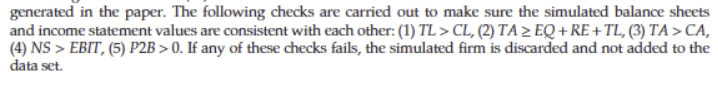

In [45]:
# Accounting identity checks from Graph NN table A.1
# If failed, set relevant variables to NaN

# Counts of involved variables before
print('counts of involved variables before')
print(corrected[['totalLiabilities', 'totalCurrentLiabilities', 'totalAssets', 'totalEquity', 'retainedEarnings', 'totalCurrentAssets', 'revenue', 'ebitda', 'depreciationAndAmortization_income_statement']].count())

# Total liabilities > current liabilities
corrected['totalLiabilities'] = np.where(corrected['totalLiabilities'] > corrected['totalCurrentLiabilities'], corrected['totalLiabilities'], np.nan)
corrected['totalCurrentLiabilities'] = np.where(corrected['totalLiabilities'] > corrected['totalCurrentLiabilities'], corrected['totalCurrentLiabilities'], np.nan)

# Counts of involved variables after
print('counts of involved variables after cond 1')
print(corrected[['totalLiabilities', 'totalCurrentLiabilities', 'totalAssets', 'totalEquity', 'retainedEarnings', 'totalCurrentAssets', 'revenue', 'ebitda', 'depreciationAndAmortization_income_statement']].count())

# Total assets >= totalEquity + retainedEarnings + totalLiabilities
# Turning off since too restrictive
# corrected['totalAssets'] = np.where(corrected['totalAssets'] >= corrected['totalEquity'] + corrected['retainedEarnings'] + corrected['totalLiabilities'], corrected['totalAssets'], np.nan)
# corrected['totalEquity'] = np.where(corrected['totalAssets'] >= corrected['totalEquity'] + corrected['retainedEarnings'] + corrected['totalLiabilities'], corrected['totalEquity'], np.nan)
# corrected['retainedEarnings'] = np.where(corrected['totalAssets'] >= corrected['totalEquity'] + corrected['retainedEarnings'] + corrected['totalLiabilities'], corrected['retainedEarnings'], np.nan)
# corrected['totalLiabilities'] = np.where(corrected['totalAssets'] >= corrected['totalEquity'] + corrected['retainedEarnings'] + corrected['totalLiabilities'], corrected['totalLiabilities'], np.nan)

# print('counts of involved variables after cond 2')
# print(corrected[['totalLiabilities', 'totalCurrentLiabilities', 'totalAssets', 'totalEquity', 'retainedEarnings', 'totalCurrentAssets', 'revenue', 'ebitda', 'depreciationAndAmortization_income_statement']].count())

# Total assets > total current assets
corrected['totalAssets'] = np.where(corrected['totalAssets'] > corrected['totalCurrentAssets'], corrected['totalAssets'], np.nan)
corrected['totalCurrentAssets'] = np.where(corrected['totalAssets'] > corrected['totalCurrentAssets'], corrected['totalCurrentAssets'], np.nan)

print('counts of involved variables after cond 3')
print(corrected[['totalLiabilities', 'totalCurrentLiabilities', 'totalAssets', 'totalEquity', 'retainedEarnings', 'totalCurrentAssets', 'revenue', 'ebitda', 'depreciationAndAmortization_income_statement']].count())

# Net sales (revenue) > EBIT
# Construct EBIT from ebitda and depreciationAndAmortization_income_statement
corrected['EBIT'] = corrected['ebitda'] - corrected['depreciationAndAmortization_income_statement']
# Check revenue
corrected['revenue'] = np.where(corrected['revenue'] > corrected['EBIT'], corrected['revenue'], np.nan)
corrected['EBIT'] = np.where(corrected['revenue'] > corrected['EBIT'], corrected['EBIT'], np.nan)

# Skipping price to book since don't have

# Counts of involved variables after all
print('counts of involved variables after all')
print(corrected[['totalLiabilities', 'totalCurrentLiabilities', 'totalAssets', 'totalEquity', 'retainedEarnings', 'totalCurrentAssets', 'revenue', 'ebitda', 'depreciationAndAmortization_income_statement']].count())

counts of involved variables before
totalLiabilities                                20825
totalCurrentLiabilities                         20825
totalAssets                                     20825
totalEquity                                     20825
retainedEarnings                                20825
totalCurrentAssets                              20825
revenue                                         20825
ebitda                                          20825
depreciationAndAmortization_income_statement    20825
dtype: int64
counts of involved variables after cond 1
totalLiabilities                                20414
totalCurrentLiabilities                         20414
totalAssets                                     20825
totalEquity                                     20825
retainedEarnings                                20825
totalCurrentAssets                              20825
revenue                                         20825
ebitda                                       

C:\Users\ijyli\AppData\Local\Temp\ipykernel_26932\2290044570.py:35: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corrected['EBIT'] = corrected['ebitda'] - corrected['depreciationAndAmortization_income_statement']


In [46]:
# Variables needed for ratios
# commonStock + preferredStock os a close approximation to market value of equity
# however, it's not a great approximation because it doesn't account for current prices and instead uses par value
corrected['common_plus_preferred_stock'] = corrected['commonStock'] + corrected['preferredStock']
# Working capital is currentAssets - currentLiabilities
corrected['workingCapital'] = corrected['totalCurrentAssets'] - corrected['totalCurrentLiabilities']

C:\Users\ijyli\AppData\Local\Temp\ipykernel_26932\3035843423.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corrected['common_plus_preferred_stock'] = corrected['commonStock'] + corrected['preferredStock']
C:\Users\ijyli\AppData\Local\Temp\ipykernel_26932\3035843423.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corrected['workingCapital'] = corrected['totalCurrentAssets'] - corrected['totalCurrentLiabilities']


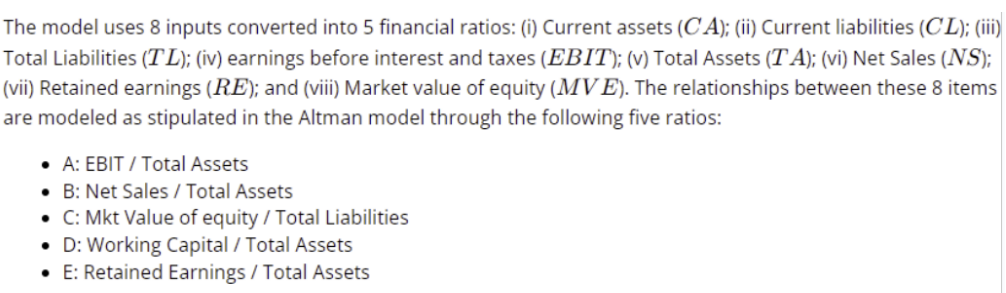

In [47]:
# Ratio A - EBIT / Total Assets
corrected['Ratio_A'] = corrected['EBIT'] / corrected['totalAssets']
# Ratio B - net sales / Total Assets
# revenue is closest approximation to net sales
corrected['Ratio_B'] = corrected['revenue'] / corrected['totalAssets']
# Ratio C - Market value of equity / Total Liabilities
if 'marketCap' not in corrected.columns:
    corrected['Ratio_C'] = (corrected['common_plus_preferred_stock']) / corrected['totalLiabilities']
else:
    corrected['Ratio_C'] = (corrected['marketCap']) / corrected['totalLiabilities']
# Ratio D - Working Capital / Total Assets
corrected['Ratio_D'] = corrected['workingCapital'] / corrected['totalAssets']
# Ratio E - Retained Earnings / Total Assets
corrected['Ratio_E'] = corrected['retainedEarnings'] / corrected['totalAssets']

C:\Users\ijyli\AppData\Local\Temp\ipykernel_26932\238543792.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corrected['Ratio_A'] = corrected['EBIT'] / corrected['totalAssets']
C:\Users\ijyli\AppData\Local\Temp\ipykernel_26932\238543792.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  corrected['Ratio_B'] = corrected['revenue'] / corrected['totalAssets']
C:\Users\ijyli\AppData\Local\Temp\ipykernel_26932\238543792.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert

In [48]:
# For all items, replace inf and -inf with NaN
corrected = corrected.replace([np.inf, -np.inf], np.nan)

In [49]:
# Briefly summarize to check construction
# use describe method, transpose, and print all rows
# round to two decimal places, no scientific notation, commas for thousands
pd.options.display.float_format = '{:,.2f}'.format
sum_stats_ratios = corrected[['Ratio_A', 'Ratio_B', 'Ratio_C', 'Ratio_D', 'Ratio_E']].describe().T
sum_stats_ratios

,count,mean,std,min,25%,50%,75%,max
Ratio_A,"19,793.00",0.06,3.80,-230.23,0.01,0.02,0.03,188.13
Ratio_B,"19,793.00",2.32,41.21,-0.00,0.10,0.18,0.29,"3,350.14"
Ratio_C,"17,703.00",536.07,"57,757.53",0.00,0.78,1.44,2.66,"7,682,958.05"
Ratio_D,"20,075.00",-0.31,9.54,-654.81,0.02,0.11,0.24,0.96
Ratio_E,"20,312.00",29.59,"4,862.33","-5,269.86",0.00,0.16,0.37,"692,819.58"


In [50]:
# every 10th percentile of Ratio_C
corrected['Ratio_C'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
# check 90th through 100th percentile of Ratio_C
corrected['Ratio_C'].quantile([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1])

0.90           4.72
0.91           5.04
0.92           5.59
0.93           6.32
0.94           7.30
0.95           8.77
0.96          11.15
0.97          16.61
0.98         428.43
0.99       1,906.32
1.00   7,682,958.05
Name: Ratio_C, dtype: float64

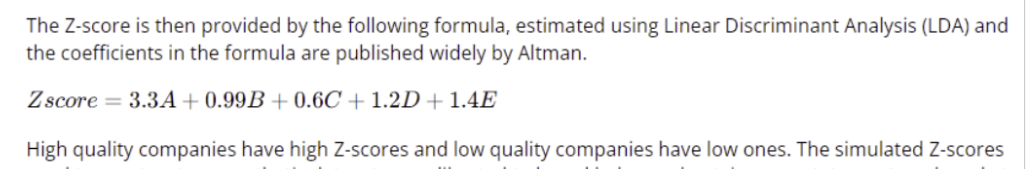

In [51]:
# Altman Z-Score

# Winsorize tricky ratios - 2.5% and 97.5%
# More aggressive winsorization for Ratio_C - 5% and 95%
cols_to_clip = ['Ratio_A', 'Ratio_B', 'Ratio_C', 'Ratio_D', 'Ratio_E']
#cols_to_clip = ['Ratio_A', 'Ratio_B', 'Ratio_E']
for column in cols_to_clip:
    if column == 'Ratio_C':
        corrected[column] = corrected[column].clip(lower=corrected[column].quantile(0.05), upper=corrected[column].quantile(0.95))
    else:
        corrected[column] = corrected[column].clip(lower=corrected[column].quantile(0.025), upper=corrected[column].quantile(0.975))

# To avoid multicollinearity, be sure to drop ratios if using Z-Score in a model
corrected['Altman_Z'] = 3.3 * corrected['Ratio_A'] + 0.99 * corrected['Ratio_B'] + 0.6 * corrected['Ratio_C'] + 1.2 * corrected['Ratio_D'] + 1.4 * corrected['Ratio_E']

In [52]:
# Briefly summarize to check construction
# use describe method, transpose, and print all rows
# round to two decimal places, no scientific notation, commas for thousands
pd.options.display.float_format = '{:,.2f}'.format
sum_stats_ratios = corrected[['Ratio_A', 'Ratio_B', 'Ratio_C', 'Ratio_D', 'Ratio_E', 'Altman_Z']].describe().T
sum_stats_ratios

,count,mean,std,min,25%,50%,75%,max
Ratio_A,"19,793.00",0.02,0.02,-0.02,0.01,0.02,0.03,0.08
Ratio_B,"19,793.00",0.22,0.16,0.04,0.10,0.18,0.29,0.73
Ratio_C,"17,703.00",2.15,2.09,0.29,0.78,1.44,2.66,8.77
Ratio_D,"20,075.00",0.14,0.16,-0.12,0.02,0.11,0.24,0.57
Ratio_E,"20,312.00",0.19,0.32,-0.64,0.00,0.16,0.37,1.02
Altman_Z,"16,983.00",2.01,1.49,-0.87,0.98,1.64,2.62,8.14


## Save final corrected data

In [53]:
# Save final tabular financial statement data
corrected.to_parquet(r'~\Box\STAT 222 Capstone\Intermediate Data\Tabular_Fin\combined_corrected_tabular_financial_statements_data.parquet', index=False)